In [8]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_excel('LastDataset1(neww).xlsx')
df.head()
# Now you can work with your dataset stored in the variable 'df'


,Nationality,Race,Gender,Disability,Status,Date_of_Birth,Campus,Study_Program,Program_Description,Faculty,...,Employed_Company_Postcode,Employed_Company_state,Employed_Company_district,Employed_Company_country,Current_Job_level,Current_Job_scope,Position_scope,Work_in_the_same_field_of_learning,1st_employment_waiting_period,Reason_for_unemployment
0,Malaysian,Chinese,Female,No,Single,1999,MLAKA,L.L.B. (Hons),BACHELOR OF LAW (HONOURS),FOL,...,50400,KUALA LUMPUR,Tiada Daerah - Kuala Lumpur,Malaysia,Private sector employee,Temporary/parttime,Non-government organization (NGO),Yes,No_data,No_data
1,Malaysian,Malay,Female,No,Single,1997,CYBER,B. B. Mgt. (Hons),BACHELOR OF BUSINESS MANAGEMENT (HONOURS),FOM,...,47500,SELANGOR,Daerah Petaling,Malaysia,Private sector employee,Permanent,No_data,Yes,1-3 months,No_data
2,Malaysian,Malay,Female,No,Single,1999,MLAKA,L.L.B. (Hons),BACHELOR OF LAW (HONOURS),FOL,...,No_data,No_data,No_data,Malaysia,No_data,No_data,No_data,No_data,No_data,Awaiting job placement (have received a job of...
3,Malaysian,Chinese,Female,No,Other,1999,MLAKA,L.L.B. (Hons),BACHELOR OF LAW (HONOURS),FOL,...,75000,MELAKA,Daerah Melaka Tengah,Malaysia,Private sector employee,Permanent,Local company,Yes,No_data,No_data
4,Malaysian,Indian,Male,No,Single,1998,MLAKA,L.L.B. (Hons),BACHELOR OF LAW (HONOURS),FOL,...,75200,No_data,Daerah Melaka Tengah,Malaysia,Private sector employee,Contract,No_data,Yes,No_data,No_data


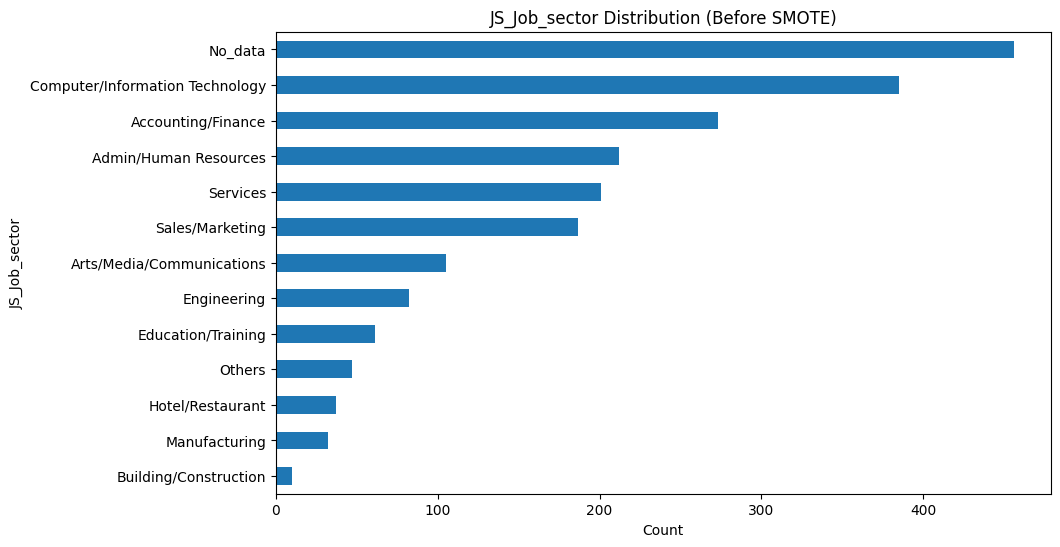

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['JS_Job_sector'] contains categorical data
brand_counts_before = df['JS_Job_sector'].value_counts()
brand_counts_before = brand_counts_before.sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
brand_counts_before.plot(kind='barh')
plt.title('JS_Job_sector Distribution (Before SMOTE)')
plt.xlabel('Count')
plt.ylabel('JS_Job_sector')
plt.show()


In [15]:
import pandas as pd

# Now you can work with your dataset stored in the variable 'df'
X = df.drop(columns=['JS_Job_sector'])
y = df['JS_Job_sector']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()



# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


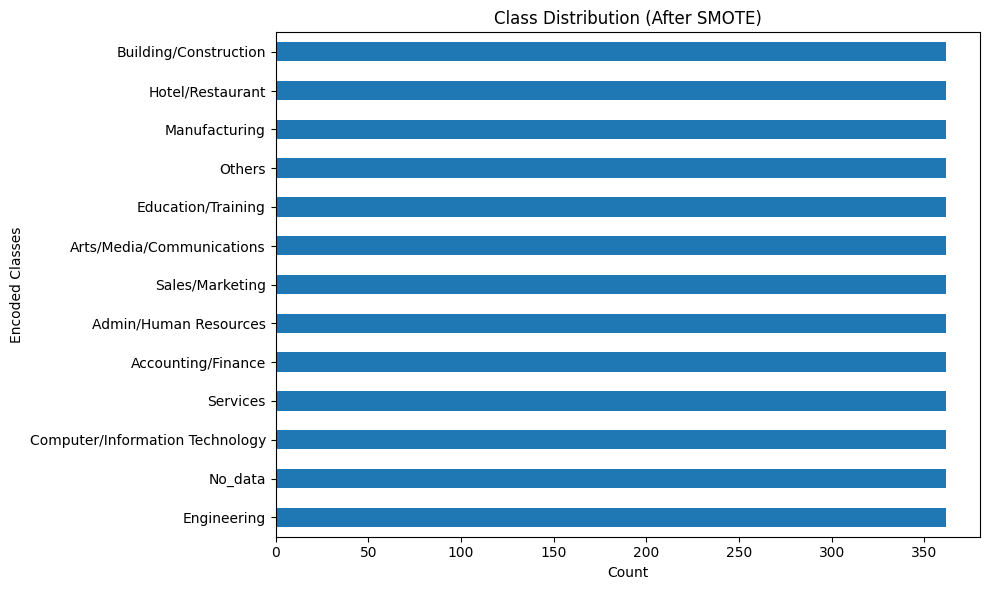

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


import matplotlib.pyplot as plt

# Class distribution after SMOTE (resampled training data)
plt.figure(figsize=(10, 6)) 
y_train_resampled.value_counts().plot(kind='barh')
plt.title('Class Distribution (After SMOTE)')
plt.xlabel('Count')
plt.ylabel('Encoded Classes')

plt.tight_layout()
plt.show()


In [88]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_excel('Dataset2neww.xlsx')
df.head()
# Now you can work with your dataset stored in the variable 'df'


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,12,5,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,3,3,3,...,6,0,0,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,37,9,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,37,5,3,...,8,0,0,10,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,38,9,9,...,9,0,0,6,13.000000,0,13.9,-0.3,0.79,2


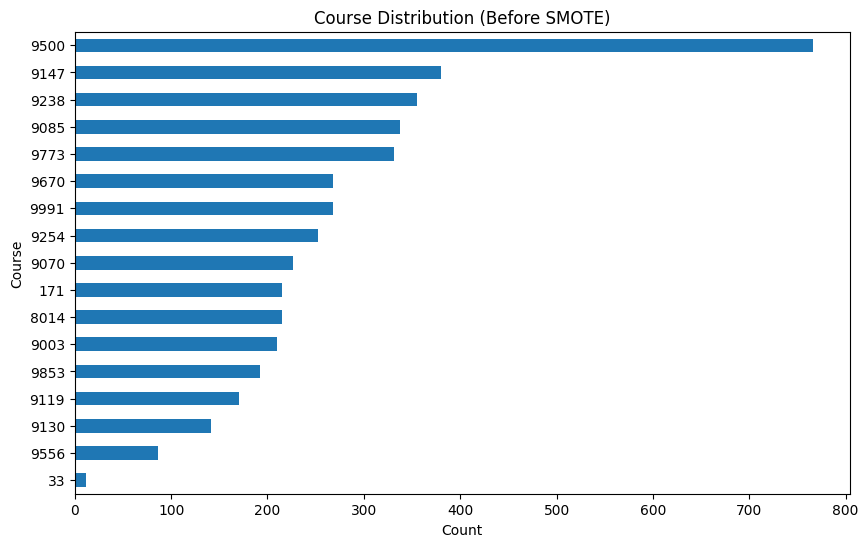

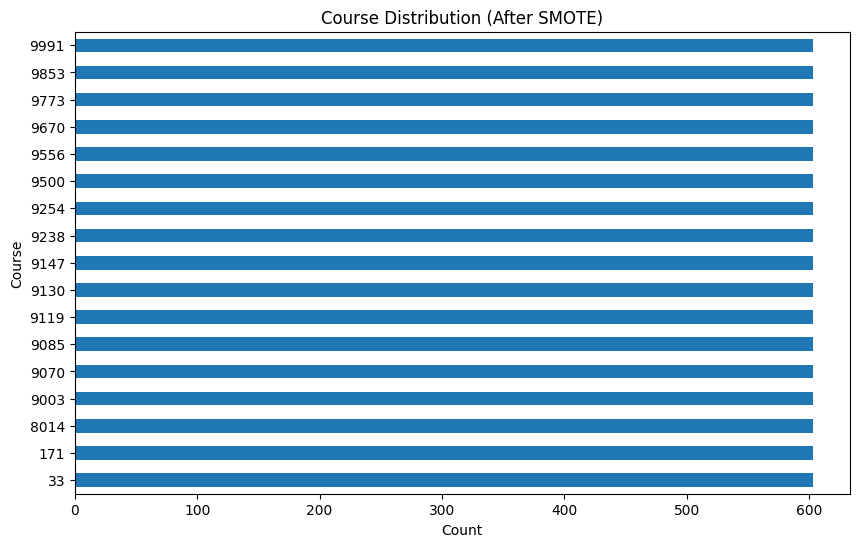

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df['Brand'] contains categorical data
brand_counts_before = df['Course'].value_counts()
brand_counts_before = brand_counts_before.sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
brand_counts_before.plot(kind='barh')
plt.title('Course Distribution (Before SMOTE)')
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()

# Now you can work with your dataset stored in the variable 'df'
X = df.drop(columns=['Course'])
y = df['Course']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()



# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Visualize the distribution after SMOTE
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='barh')
plt.title('Course Distribution (After SMOTE)')
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()


In [40]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('Dataset33new (1).csv')
df.head()
# Now you can work with your dataset stored in the variable 'df'


,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,MG,2022,MG3,USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
1,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
2,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
3,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
4,Land,2017,Rover,USED,Automatic,AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280


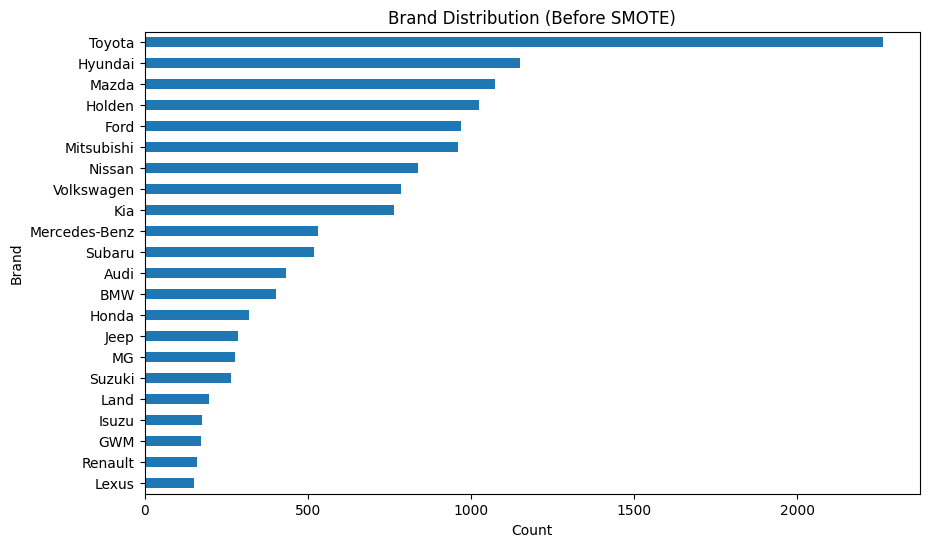

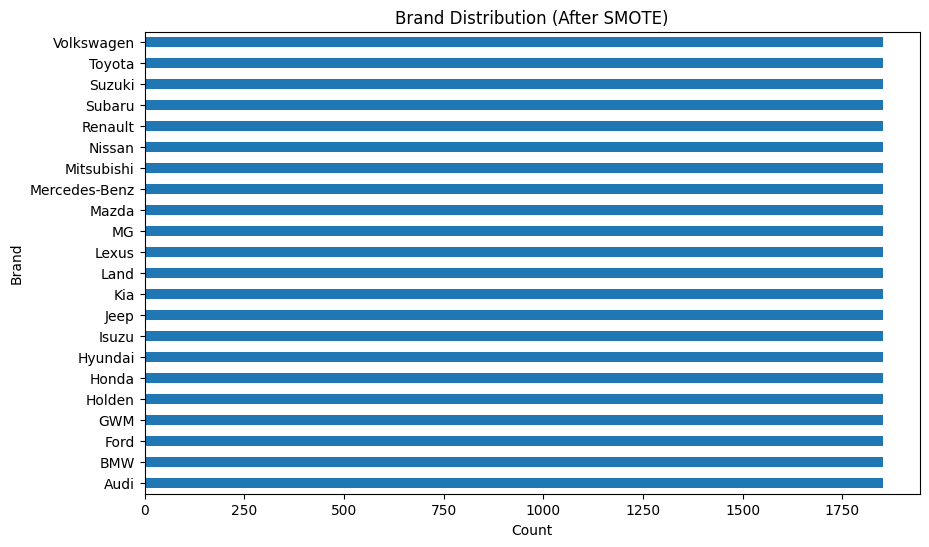

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df['Brand'] contains categorical data
brand_counts_before = df['Brand'].value_counts()
brand_counts_before = brand_counts_before.sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
brand_counts_before.plot(kind='barh')
plt.title('Brand Distribution (Before SMOTE)')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

# Now you can work with your dataset stored in the variable 'df'
X = df.drop(columns=['Brand'])
y = df['Brand']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()



# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Visualize the distribution after SMOTE
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='barh')
plt.title('Brand Distribution (After SMOTE)')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()
